<a href="https://colab.research.google.com/github/novitafitriana/sentiment-analysis-streamlit/blob/main/analisis_sentiment_tring_pegadaian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ganti path sesuai lokasi file di Drive kamu
df = pd.read_csv("/content/drive/MyDrive/DATMIN/FP/reviewpegadaian200.csv")
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02  
1                                     aplikasi bagus  2025-11-17 01:58:19  
2                                              bagus  2025-11-17 01:53:45  
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58  
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50

In [3]:
!pip install Sastrawi
## Library untuk preprocessing teks
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Library untuk vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

## Library untuk evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


# **Memahami Data (Understanding Data)**

In [4]:
# Memeriksa missing value
df.isnull().sum()

userName    0
score       0
content     0
at          0
dtype: int64

In [5]:
# Statistik deskriptif untuk melihat sebaran data
df.describe()

score
count  200.000000
mean     3.485000
std      1.840301
min      1.000000
25%      1.000000
50%      5.000000
75%      5.000000
max      5.000000

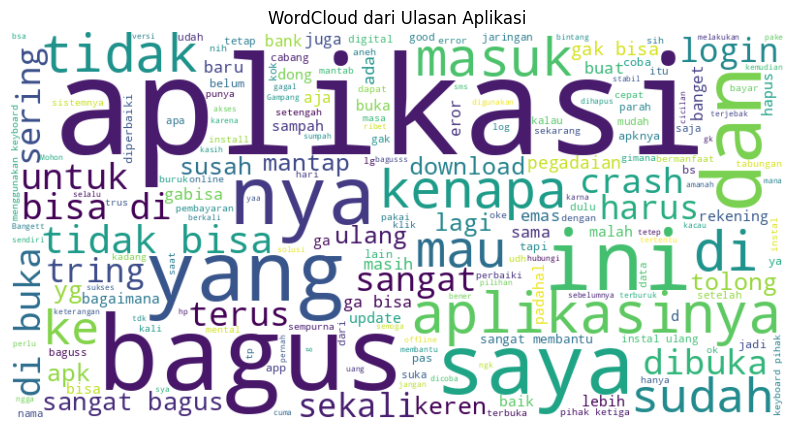

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
text = ' '.join(df['content'])  # Menggunakan kolom 'content' atau 'clean_content'

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Menyembunyikan axis
plt.title("WordCloud dari Ulasan Aplikasi")
plt.show()

# EDA (Exploratory Data Analysis)

/tmp/ipython-input-2238412364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['score'], palette='viridis')


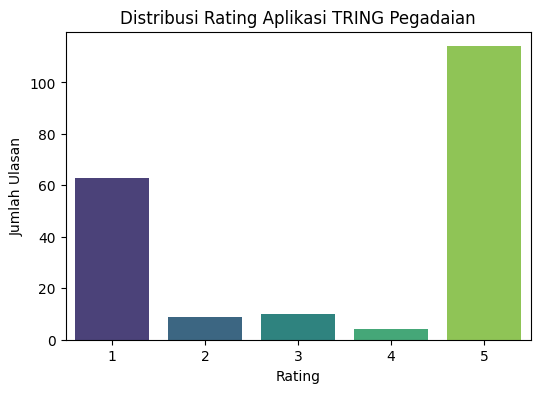

In [7]:
#Grafik 1 — Distribusi Rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['score'], palette='viridis')
plt.title('Distribusi Rating Aplikasi TRING Pegadaian')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.show()

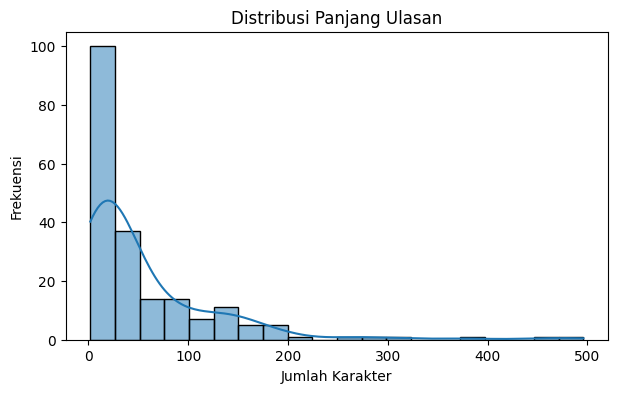

In [8]:
#Grafik 2 — Panjang Ulasan
df['review_length'] = df['content'].astype(str).apply(len)

plt.figure(figsize=(7,4))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Distribusi Panjang Ulasan')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

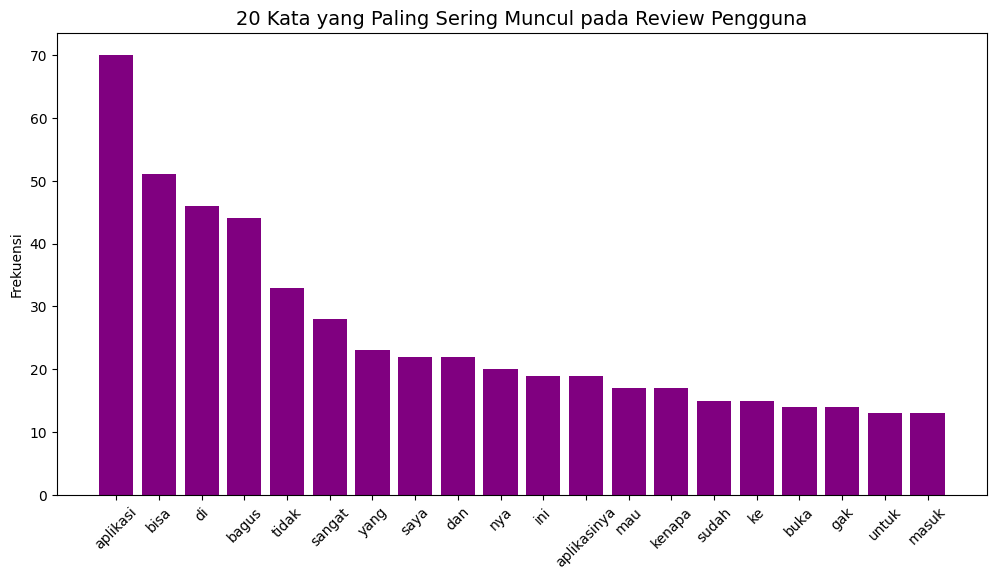

In [9]:
df['clean_review'] = df['content'].astype(str).str.lower()

from collections import Counter
import itertools
import matplotlib.pyplot as plt

# Pastikan kolom clean_review tidak ada NaN
df['clean_review'] = df['clean_review'].fillna("")

# Ubah semua review menjadi list kata
all_words = list(
    itertools.chain.from_iterable(
        df['clean_review'].apply(lambda x: x.split()).tolist()
    )
)

# Ambil 20 kata paling sering
counter = Counter(all_words).most_common(20)

# Pisahkan kata & frekuensi
words = [w for w, c in counter]
counts = [c for w, c in counter]

# Plot grafik
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='purple')
plt.title("20 Kata yang Paling Sering Muncul pada Review Pengguna", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Frekuensi")
plt.show()

# CLEANING

In [10]:
df.dropna(inplace=True)

In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus angka & tanda baca
    text = re.sub(r'\s+', ' ', text)          # hapus spasi dobel
    return text.strip()

df['clean_review'] = df['content'].apply(clean_text)

In [12]:
print("=== Setelah Cleaning ===")
df[['content', 'clean_review']].head()


=== Setelah Cleaning ===


content  \
0  tetiba crash, gabisa dibuka, sudah di install ...   
1                                     aplikasi bagus   
2                                              bagus   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                        clean_review  
0  tetiba crash gabisa dibuka sudah di install ul...  
1                                     aplikasi bagus  
2                                              bagus  
3  ini pegadaian it nya cuma ngopi doang ama nger...  
4  aplikasi pembiayaan terburuk yang pernah saya ...

# CASE FOLDING

In [13]:
df['clean_review'] = df['clean_review'].str.lower()

In [14]:
print("=== Setelah Case Folding ===")
print(df['clean_review'].iloc[0])

=== Setelah Case Folding ===
tetiba crash gabisa dibuka sudah di install ulang bisa digunakan sekali stelah itu crash lagi gabisa dibuka aneh qanya kaga bener ini bisa nya aplikasi crash lolos pengujian


In [15]:
df[['content', 'clean_review']].head()

content  \
0  tetiba crash, gabisa dibuka, sudah di install ...   
1                                     aplikasi bagus   
2                                              bagus   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                        clean_review  
0  tetiba crash gabisa dibuka sudah di install ul...  
1                                     aplikasi bagus  
2                                              bagus  
3  ini pegadaian it nya cuma ngopi doang ama nger...  
4  aplikasi pembiayaan terburuk yang pernah saya ...

# NORMALISASI

In [16]:
slang_dict = {
    "gak": "tidak",
    "ga": "tidak",
    "gabisa": "tidak bisa",
    "nggak": "tidak",
    "ngga": "tidak",
    "gk": "tidak",
    "tdk": "tidak",
    "tak": "tidak",
    "bgt": "banget",
    "bngt": "banget",
    "banget": "sangat",
    "bener": "benar",
    "beneran": "benaran",
    "aja": "saja",
    "aj": "saja",
    "nya": "nya",
    "nih": "ini",
    "nihh": "ini",
    "dong": "",
    "doang" : "aja",
    "dongg": "",
    "kok": "",
    "loh": "",
    "lho": "",
    "deh": "",
    "mah": "",
    "sih": "",
    "jg": "juga",
    "jd": "jadi",
    "jadiin": "jadikan",
    "skrg": "sekarang",
    "kmrn": "kemarin",
    "besok2": "besok",
    "dr": "dari",
    "dri": "dari",
    "darii": "dari",
    "mauu": "mau",
    "mauuu": "mau",
    "bisaaa": "bisa",
    "bisaa": "bisa",
    "susahh": "susah",
    "susahhh": "susah",
    "baguss": "bagus",
    "bagusss": "bagus",
    "bgt": "banget",
    "bnyk": "banyak",
    "banyakkk": "banyak",
    "kalo": "kalau",
    "klo": "kalau",
    "klw": "kalau",
    "dgn": "dengan",
    "tp": "tapi",
    "tpi": "tapi",
    "krn": "karena",
    "karna": "karena",
    "sbnr": "sebenarnya",
    "sbnrnya": "sebenarnya",
    "apk": "aplikasi",
    "aplikasinya": "aplikasi",
    "gmn": "bagaimana",
    "gimana": "bagaimana",
    "ok": "baik",
    "oke": "baik",
    "okey": "baik",
    "mantap": "baik",
    "mantapp": "baik",
    "mantabb": "baik",
    "dikit": "sedikit",
    "sdkt": "sedikit",
    "msh": "masih",
    "msih": "masih",
    "lgi": "lagi",
    "lg": "lagi",
    "udh": "sudah",
    "udah": "sudah",
    "sudaah": "sudah"
}


In [17]:
def normalize_slang(text):
    words = text.split()
    normalized_words = []

    for w in words:
        w_lower = w.lower().strip()
        if w_lower in slang_dict:
            normalized_words.append(slang_dict[w_lower])
        else:
            normalized_words.append(w_lower)

    return " ".join(normalized_words)
    # Menambahkan kolom normalized_content setelah proses normalisasi slang
df['normalized_content'] = df['clean_review'].apply(normalize_slang)


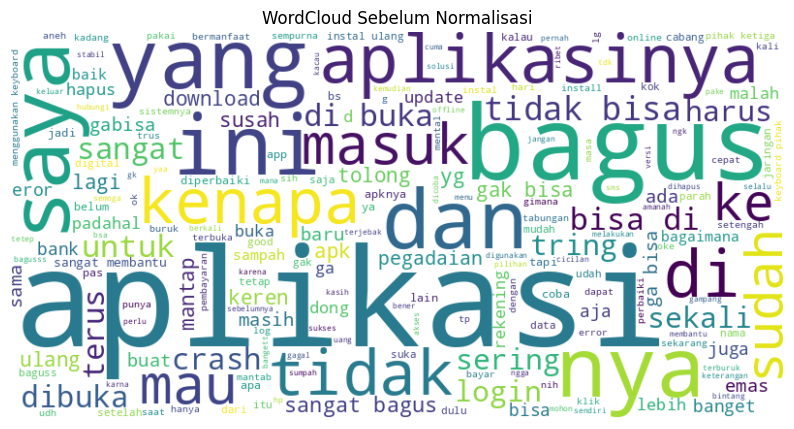

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks asli (sebelum normalisasi)
text_before_normalization = ' '.join(df['clean_review'])

# Membuat WordCloud untuk teks sebelum normalisasi
wordcloud_before = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_before_normalization)

# Menampilkan WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_before, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud Sebelum Normalisasi")
plt.show()


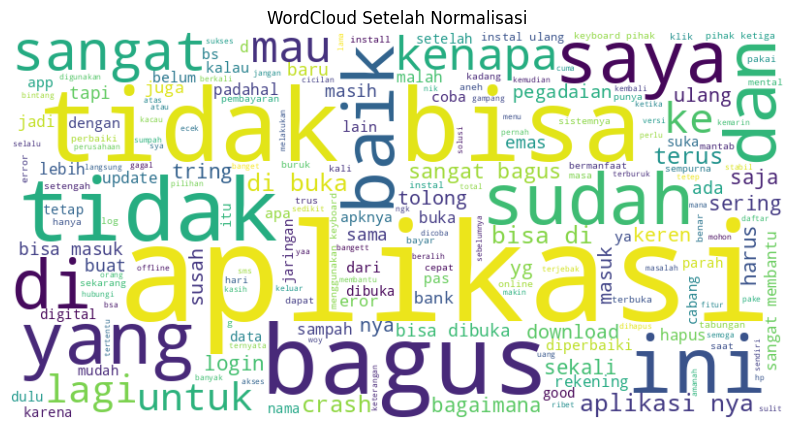

In [19]:
# Menggabungkan semua teks setelah normalisasi
text_after_normalization = ' '.join(df['normalized_content'])  # Jika sudah ada kolom 'normalized_content'

# Membuat WordCloud untuk teks setelah normalisasi
wordcloud_after = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_after_normalization)

# Menampilkan WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_after, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud Setelah Normalisasi")
plt.show()

In [20]:
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  \
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02   
1                                     aplikasi bagus  2025-11-17 01:58:19   
2                                              bagus  2025-11-17 01:53:45   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58   
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50   

   review_length                                       clean_review  \
0            179  tetiba crash gabisa dibuka sudah di install ul...   
1             14                                     aplikasi bagus   
2              5                                              bagus   
3            106  ini pegadaian it nya cuma ngopi doang ama nger...   
4            263  aplikasi pembiayaan terburuk yang pernah saya ...   

                                  normalized_content  
0  tetiba crash tidak bisa dibuka sudah di instal...  
1                                     aplikasi bagus  
2                                              bagus  
3  ini pegadaian it nya cuma ngopi aja ama ngerok...  
4  aplikasi pembiayaan terburuk yang pernah saya ...

# TOKENIZATION

In [21]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Tokenisasi setelah normalisasi
df['tokens'] = df['normalized_content'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [22]:
print(df[['content', 'tokens']].head())

                                             content  \
0  tetiba crash, gabisa dibuka, sudah di install ...   
1                                     aplikasi bagus   
2                                              bagus   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                              tokens  
0  [tetiba, crash, tidak, bisa, dibuka, sudah, di...  
1                                  [aplikasi, bagus]  
2                                            [bagus]  
3  [ini, pegadaian, it, nya, cuma, ngopi, aja, am...  
4  [aplikasi, pembiayaan, terburuk, yang, pernah,...  


# STOPWORDS REMOVAL

In [23]:
def get_stopword(stopwordsfile):
    stopwords=[]
    file_stopwords = open(stopwordsfile,'r')
    row = file_stopwords.readline()
    while row:
        word = row.strip()
        stopwords.append(word)
        row = file_stopwords.readline()
    file_stopwords.close()
    return stopwords

stop_words_indo = get_stopword('/content/drive/MyDrive/DATMIN/stopwordsindo.txt')

In [24]:
def remove_stopwords(tokens):
    return [w for w in tokens if w not in stop_words_indo]

df['tokens'] = df['normalized_content'].apply(word_tokenize)
df['tokens_no_stop'] = df['tokens'].apply(remove_stopwords)

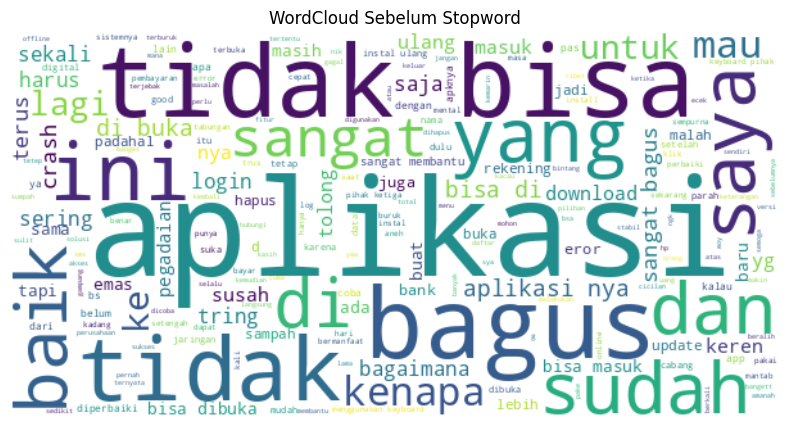

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud sebelum stopword
text_before = " ".join(df['normalized_content'])

wc_before = WordCloud(width=600, height=300, background_color='white').generate(text_before)

plt.figure(figsize=(10,5))
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Sebelum Stopword")
plt.show()

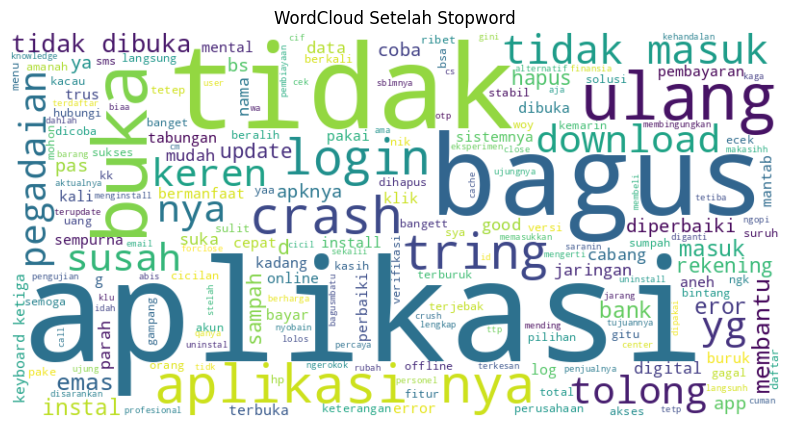

In [26]:
# Wordcloud setelah stopword
text_after = " ".join(df['tokens_no_stop'].apply(lambda x: " ".join(x)))

wc_after = WordCloud(width=800, height=400, background_color='white').generate(text_after)

plt.figure(figsize=(10,5))
plt.imshow(wc_after, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Setelah Stopword")
plt.show()

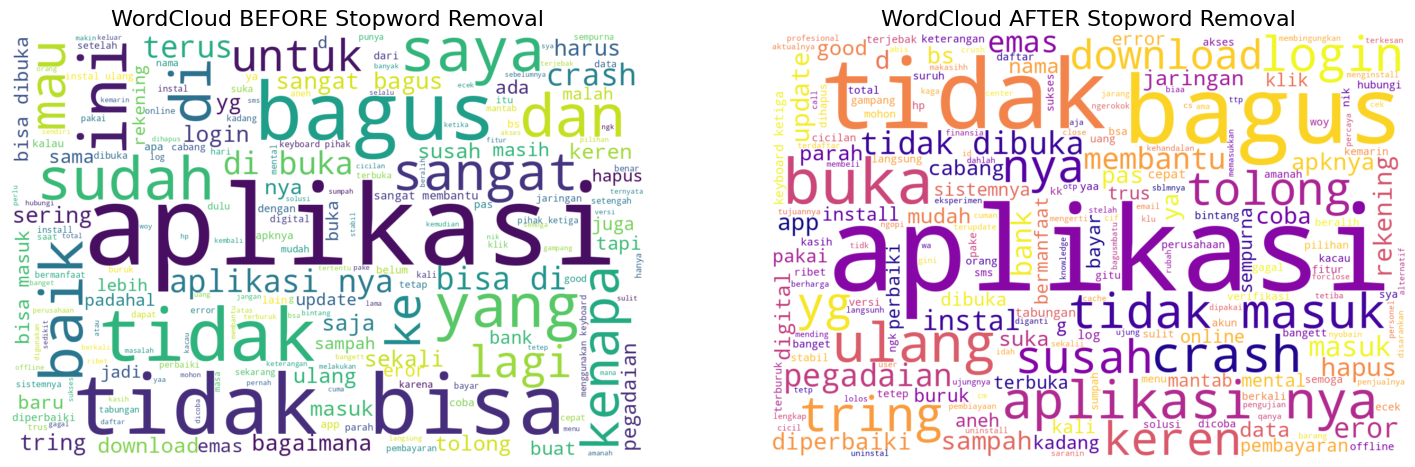

In [27]:
# Wordcloud sebelum stopword
wc_before = WordCloud(width=1200, height=800,
                      background_color='white',
                      colormap='viridis').generate(text_before)

# Wordcloud sesudah stopword
wc_after = WordCloud(width=1200, height=800,
                     background_color='white',
                     colormap='plasma').generate(text_after)

plt.figure(figsize=(18, 10))

# BEFORE
plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.title("WordCloud BEFORE Stopword Removal", fontsize=16)
plt.axis('off')

# AFTER
plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.title("WordCloud AFTER Stopword Removal", fontsize=16)
plt.axis('off')

plt.show()


In [28]:
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  \
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02   
1                                     aplikasi bagus  2025-11-17 01:58:19   
2                                              bagus  2025-11-17 01:53:45   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58   
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50   

   review_length                                       clean_review  \
0            179  tetiba crash gabisa dibuka sudah di install ul...   
1             14                                     aplikasi bagus   
2              5                                              bagus   
3            106  ini pegadaian it nya cuma ngopi doang ama nger...   
4            263  aplikasi pembiayaan terburuk yang pernah saya ...   

                                  normalized_content  \
0  tetiba crash tidak bisa dibuka sudah di instal...   
1                                     aplikasi bagus   
2                                              bagus   
3  ini pegadaian it nya cuma ngopi aja ama ngerok...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                              tokens  \
0  [tetiba, crash, tidak, bisa, dibuka, sudah, di...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [ini, pegadaian, it, nya, cuma, ngopi, aja, am...   
4  [aplikasi, pembiayaan, terburuk, yang, pernah,...   

                                      tokens_no_stop  
0  [tetiba, crash, tidak, dibuka, install, ulang,...  
1                                  [aplikasi, bagus]  
2                                            [bagus]  
3  [pegadaian, it, nya, ngopi, aja, ama, ngerokok...  
4  [aplikasi, pembiayaan, terburuk, pakai, membin...

# STEMMING

In [29]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada setiap token
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan stemming pada kolom 'tokens'
df['stemmed_tokens'] = df['tokens_no_stop'].apply(stemming)

# Menampilkan beberapa hasil stemming
print(df[['normalized_content', 'tokens_no_stop', 'stemmed_tokens']].head())

                                  normalized_content  \
0  tetiba crash tidak bisa dibuka sudah di instal...   
1                                     aplikasi bagus   
2                                              bagus   
3  ini pegadaian it nya cuma ngopi aja ama ngerok...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                      tokens_no_stop  \
0  [tetiba, crash, tidak, dibuka, install, ulang,...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [pegadaian, it, nya, ngopi, aja, ama, ngerokok...   
4  [aplikasi, pembiayaan, terburuk, pakai, membin...   

                                      stemmed_tokens  
0  [tetiba, crash, tidak, buka, install, ulang, s...  
1                                  [aplikasi, bagus]  
2                                            [bagus]  
3  [gadai, it, nya, ngopi, aja, ama, ngerokok, ya...  
4  [aplikasi, biaya, buruk, pakai, bingung, kes, ..

In [30]:
# Gabungkan hasil stemming menjadi satu string
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda x: " ".join(x))

# Sekarang kita bisa menggabungkan seluruh kolom menjadi satu teks
text_stemmed = " ".join(df['stemmed_text'])

In [31]:
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  \
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02   
1                                     aplikasi bagus  2025-11-17 01:58:19   
2                                              bagus  2025-11-17 01:53:45   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58   
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50   

   review_length                                       clean_review  \
0            179  tetiba crash gabisa dibuka sudah di install ul...   
1             14                                     aplikasi bagus   
2              5                                              bagus   
3            106  ini pegadaian it nya cuma ngopi doang ama nger...   
4            263  aplikasi pembiayaan terburuk yang pernah saya ...   

                                  normalized_content  \
0  tetiba crash tidak bisa dibuka sudah di instal...   
1                                     aplikasi bagus   
2                                              bagus   
3  ini pegadaian it nya cuma ngopi aja ama ngerok...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                              tokens  \
0  [tetiba, crash, tidak, bisa, dibuka, sudah, di...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [ini, pegadaian, it, nya, cuma, ngopi, aja, am...   
4  [aplikasi, pembiayaan, terburuk, yang, pernah,...   

                                      tokens_no_stop  \
0  [tetiba, crash, tidak, dibuka, install, ulang,...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [pegadaian, it, nya, ngopi, aja, ama, ngerokok...   
4  [aplikasi, pembiayaan, terburuk, pakai, membin...   

                                      stemmed_tokens  \
0  [tetiba, crash, tidak, buka, install, ulang, s...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [gadai, it, nya, ngopi, aja, ama, ngerokok, ya...   
4  [aplikasi, biaya, buruk, pakai, bingung, kes, ...   

                                        stemmed_text  
0  tetiba crash tidak buka install ulang stelah c...  
1                                     aplikasi bagus  
2                                              bagus  
3  gadai it nya ngopi aja ama ngerokok ya abis up...  
4  aplikasi biaya buruk pakai bingung kes tidak p...

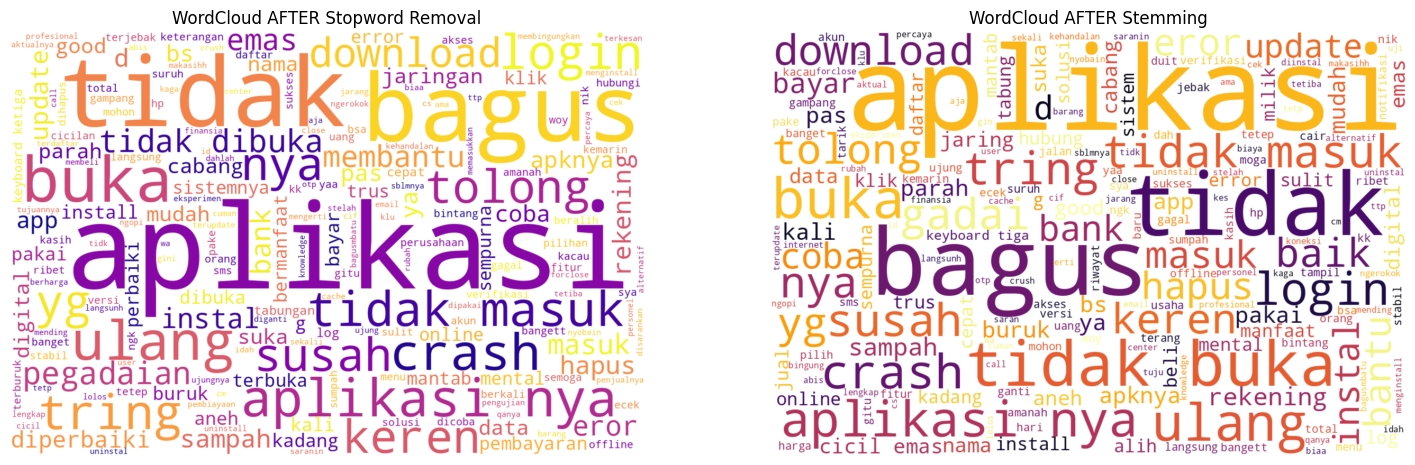

In [32]:
plt.figure(figsize=(18, 10))
# generate wordcloud
wc_stemmed = WordCloud(width=1200, height=800,
                       background_color='white',
                       colormap='inferno').generate(text_stemmed)

# Wordcloud setelah stopword
plt.subplot(1, 2, 1)
plt.imshow(wc_after, interpolation='bilinear')
plt.title("WordCloud AFTER Stopword Removal")
plt.axis('off')

# Wordcloud setelah stemming
plt.subplot(1, 2, 2)
plt.imshow(wc_stemmed, interpolation='bilinear')
plt.title("WordCloud AFTER Stemming")
plt.axis('off')

plt.show()

# PELABELAN

In [33]:
def map_sentiment(score):
    if score <= 2:
        return "negatif"
    elif score == 3:
        return "netral"
    else:
        return "positif"

df["label"] = df["score"].apply(map_sentiment)

In [34]:
df.head()
df["label"].value_counts()

label
positif    118
negatif     72
netral      10
Name: count, dtype: int64

In [35]:
df_binary = df[df['label'].isin(['positif', 'negatif'])].copy()

In [36]:
df_binary['label'].value_counts()

label
positif    118
negatif     72
Name: count, dtype: int64

In [37]:
# ============================================
# 2. SIMPAN CSV BINARY (Positif & Negatif saja)
# ============================================

# Filter hanya 2 kelas untuk klasifikasi binary
df_binary = df[df['label'].isin(['positif', 'negatif'])].copy()

# Simpan ke CSV
df_binary.to_csv("/content/drive/MyDrive/DATMIN/FP/tring_preprocessed_binary.csv",
                 index=False, encoding="utf-8")

print("✔️ File binary berhasil disimpan sebagai: tring_preprocessed_binary.csv")



# ============================================
# 3. Tampilkan ukuran dataset untuk memastikan
# ============================================

print("\n--- Informasi Dataset ---")
print("Full dataset :", df.shape)
print("Binary dataset :", df_binary.shape)
print(df_binary['label'].value_counts())

✔️ File binary berhasil disimpan sebagai: tring_preprocessed_binary.csv

--- Informasi Dataset ---
Full dataset : (200, 12)
Binary dataset : (190, 12)
label
positif    118
negatif     72
Name: count, dtype: int64


In [38]:
!pip install nltk textblob

In [39]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def vader_label_binary(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "positif"
    else:
        return "negatif"

df['label_vader'] = df['clean_review'].apply(vader_label_binary)

df[['clean_review', 'label_vader']].head()


clean_review label_vader
0  tetiba crash gabisa dibuka sudah di install ul...     negatif
1                                     aplikasi bagus     negatif
2                                              bagus     negatif
3  ini pegadaian it nya cuma ngopi doang ama nger...     negatif
4  aplikasi pembiayaan terburuk yang pernah saya ...     negatif

In [41]:
df['label_vader'].value_counts()

label_vader
negatif    190
positif     10
Name: count, dtype: int64

# TEXT BLOB

In [42]:
!pip install textblob
from textblob import TextBlob

def get_tb_polarity(text):
    return TextBlob(text).sentiment.polarity   # range -1 to 1

df['tb_polarity'] = df['stemmed_text'].apply(get_tb_polarity)

def tb_label_binary(score):
    if score > 0:
        return 'positif'
    else:
        return 'negatif'

df['tb_label'] = df['tb_polarity'].apply(tb_label_binary)

print(df[['stemmed_text', 'tb_polarity', 'tb_label']].head())

print("\nJumlah Sentimen TextBlob (Binary):")
print(df['tb_label'].value_counts())


                                        stemmed_text  tb_polarity tb_label
0  tetiba crash tidak buka install ulang stelah c...          0.0  negatif
1                                     aplikasi bagus          0.0  negatif
2                                              bagus          0.0  negatif
3  gadai it nya ngopi aja ama ngerokok ya abis up...          0.0  negatif
4  aplikasi biaya buruk pakai bingung kes tidak p...          0.0  negatif

Jumlah Sentimen TextBlob (Binary):
tb_label
negatif    193
positif      7
Name: count, dtype: int64


In [43]:
!pip install transformers torch --quiet

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "finiteautomata/bertweet-base-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Label umum:
label_map = {0: "negatif", 1: "netral", 2: "positif"}

def sentiment_label(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)
    pred = torch.argmax(probs).item()
    return label_map[pred]

df['label_transformer'] = df['stemmed_text'].apply(sentiment_label)

df[['stemmed_text', 'label_transformer']].head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

stemmed_text label_transformer
0  tetiba crash tidak buka install ulang stelah c...            netral
1                                     aplikasi bagus            netral
2                                              bagus            netral
3  gadai it nya ngopi aja ama ngerokok ya abis up...            netral
4  aplikasi biaya buruk pakai bingung kes tidak p...            netral

In [44]:
# Lexicon Sentimen Indonesia (Ringkas + efektif)
lexicon_positive = {
    "bagus", "baik", "mantap", "keren", "lancar", "cepat", "mudah",
    "nyaman", "puas", "jempol", "top", "terbaik", "mengapresiasi",
    "bantu", "responsif", "aman", "baguss", "rekomendasi", "terimakasih"
}

lexicon_negative = {
    "jelek", "buruk", "parah", "susah", "error", "lama", "lemot",
    "macet", "gagal", "kecewa", "tidak", "payah", "masalah",
    "terlalu", "menyusahkan", "tidak bisa", "penipuan", "hang", "crash"
}

In [45]:
def lexicon_label_binary(text):
    words = text.split()
    score_pos = sum(1 for w in words if w in lexicon_positive)
    score_neg = sum(1 for w in words if w in lexicon_negative)

    # Buat binary
    if score_pos > score_neg:
        return "positif"
    else:
        return "negatif"

df['label_lexicon'] = df['stemmed_text'].apply(lexicon_label_binary)
df[['stemmed_text','label_lexicon']].head()


stemmed_text label_lexicon
0  tetiba crash tidak buka install ulang stelah c...       negatif
1                                     aplikasi bagus       positif
2                                              bagus       positif
3  gadai it nya ngopi aja ama ngerokok ya abis up...       negatif
4  aplikasi biaya buruk pakai bingung kes tidak p...       negatif

In [46]:
from collections import Counter
import itertools

# Gabungkan semua stemmed text
all_words = list(itertools.chain.from_iterable(
    df['stemmed_text'].apply(lambda x: x.split()).tolist()
))

# Ambil 50 kata paling sering
top_words = Counter(all_words).most_common(50)
top_words


[('aplikasi', 105),
 ('tidak', 78),
 ('bagus', 54),
 ('buka', 36),
 ('nya', 23),
 ('masuk', 19),
 ('ulang', 14),
 ('crash', 12),
 ('login', 11),
 ('tring', 11),
 ('susah', 11),
 ('gadai', 10),
 ('tolong', 10),
 ('yg', 10),
 ('keren', 10),
 ('download', 10),
 ('baik', 9),
 ('bantu', 8),
 ('eror', 8),
 ('emas', 8),
 ('hapus', 8),
 ('bank', 7),
 ('instal', 7),
 ('coba', 7),
 ('update', 6),
 ('d', 6),
 ('bayar', 6),
 ('rekening', 6),
 ('sampah', 6),
 ('ya', 5),
 ('buruk', 5),
 ('pakai', 5),
 ('parah', 5),
 ('kali', 5),
 ('apknya', 5),
 ('pas', 5),
 ('mudah', 5),
 ('bs', 5),
 ('app', 5),
 ('aneh', 4),
 ('data', 4),
 ('cabang', 4),
 ('jaring', 4),
 ('digital', 4),
 ('suka', 4),
 ('cicil', 4),
 ('good', 4),
 ('in', 4),
 ('nama', 4),
 ('install', 3)]

In [47]:
# pisahkan data berdasarkan label manual kamu
pos_text = " ".join(df[df['label'] == "positif"]['stemmed_text'])
neg_text = " ".join(df[df['label'] == "negatif"]['stemmed_text'])

pos_words = Counter(pos_text.split())
neg_words = Counter(neg_text.split())

# threshold minimum agar tidak masuk kata-kata tidak penting
min_freq = 3

auto_positive = {w for w, c in pos_words.items() if c >= min_freq}
auto_negative = {w for w, c in neg_words.items() if c >= min_freq}

print("Kata positif otomatis:", list(auto_positive)[:30])
print("Kata negatif otomatis:", list(auto_negative)[:30])

Kata positif otomatis: ['apknya', 'masuk', 'bantu', 'mudah', 'buka', 'good', 'tolong', 'aplikasi', 'bagus', 'cepat', 'tidak', 'keren', 'nya']
Kata negatif otomatis: ['pas', 'eror', 'download', 'yg', 'crash', 'bs', 'instal', 'solusi', 'g', 'gadai', 'ya', 'parah', 'klik', 'sistem', 'in', 'pakai', 'bank', 'masuk', 'keyboard', 'kali', 'hapus', 'tabung', 'tolong', 'emas', 'install', 'error', 'sampah', 'aplikasi', 'bagus', 'data']


In [48]:
lexicon_positive = lexicon_positive.union(auto_positive)
lexicon_negative = lexicon_negative.union(auto_negative)

print("Total kata positif:", len(lexicon_positive))
print("Total kata negatif:", len(lexicon_negative))

Total kata positif: 27
Total kata negatif: 64


In [49]:
df['label_lexicon'] = df['stemmed_text'].apply(lexicon_label_binary)

df.to_csv("/content/tring_label_lexicon.csv", index=False, encoding="utf-8")
print("✔ CSV lexicon saved as tring_label_lexicon.csv")


✔ CSV lexicon saved as tring_label_lexicon.csv


In [50]:
df['label_lexicon'].value_counts()

label_lexicon
negatif    169
positif     31
Name: count, dtype: int64

# indobert


In [51]:
!pip install transformers --quiet
!pip install torch --quiet

In [52]:
import pandas as pd
from transformers import pipeline

df["stemmed_text"] = df["stemmed_text"].astype(str)

model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

sentiment_pipeline = pipeline(
    "text-classification",
    model=model_name,
    tokenizer=model_name
)

def predict_sentiment(text):
    text = text.strip()
    if text == "":
        return "neutral"
    return sentiment_pipeline(text)[0]["label"]

df["sentiment_indobert"] = df["stemmed_text"].apply(predict_sentiment)

print("=== Jumlah Sentimen ===")
df['sentiment_indobert'].value_counts()

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


=== Jumlah Sentimen ===


sentiment_indobert
positive    96
neutral     53
negative    51
Name: count, dtype: int64

In [53]:
# ------------------------------------------------------------
# 5. Simpan Hasil ke CSV
# ------------------------------------------------------------
df.to_csv("hasil_sentimen_indobert.csv", index=False)
print("\nFile berhasil disimpan: hasil_sentimen_indobert_3kelas.csv")



File berhasil disimpan: hasil_sentimen_indobert_3kelas.csv


In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_true = df['label']           # label manual dari rating
y_pred = df['label_lexicon']   # label dari lexicon

print("=== AKURASI ===")
print(accuracy_score(y_true, y_pred))

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_true, y_pred))


=== AKURASI ===
0.505

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     negatif       0.42      0.99      0.59        72
      netral       0.00      0.00      0.00        10
     positif       0.97      0.25      0.40       118

    accuracy                           0.51       200
   macro avg       0.46      0.41      0.33       200
weighted avg       0.72      0.51      0.45       200


=== CONFUSION MATRIX ===
[[71  0  1]
 [10  0  0]
 [88  0 30]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_true = df['label']           # label manual dari rating
y_pred = df['tb_label']   # label dari vader

print("=== AKURASI ===")
print(accuracy_score(y_true, y_pred))

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_true, y_pred))


=== AKURASI ===
0.385

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     negatif       0.37      0.99      0.54        72
      netral       0.00      0.00      0.00        10
     positif       0.86      0.05      0.10       118

    accuracy                           0.39       200
   macro avg       0.41      0.35      0.21       200
weighted avg       0.64      0.39      0.25       200


=== CONFUSION MATRIX ===
[[ 71   0   1]
 [ 10   0   0]
 [112   0   6]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
#sinkronikasi indobert dengan label manual
df["label_fixed"] = df["label"].replace({
    "positif": "positive",
    "negatif": "negative",
    "netral": "neutral"
})

In [57]:
# 7. EVALUASI MODEL (Akurasi, Classification Report, Confusion Matrix)
y_true = df["label_fixed"]         # label manual
y_pred = df["sentiment_indobert"]  # hasil IndoBERT

print("\n=== AKURASI MODEL INDOBERT ===")
print(accuracy_score(y_true, y_pred))

print("\n=== CLASSIFICATION REPORT INDOBERT ===")
print(classification_report(y_true, y_pred, digits=4))

print("\n=== CONFUSION MATRIX INDOBERT ===")
print(confusion_matrix(y_true, y_pred))


=== AKURASI MODEL INDOBERT ===
0.655

=== CLASSIFICATION REPORT INDOBERT ===
              precision    recall  f1-score   support

    negative     0.8039    0.5694    0.6667        72
     neutral     0.0566    0.3000    0.0952        10
    positive     0.9062    0.7373    0.8131       118

    accuracy                         0.6550       200
   macro avg     0.5889    0.5356    0.5250       200
weighted avg     0.8269    0.6550    0.7245       200


=== CONFUSION MATRIX INDOBERT ===
[[41 24  7]
 [ 5  3  2]
 [ 5 26 87]]


wordcloud

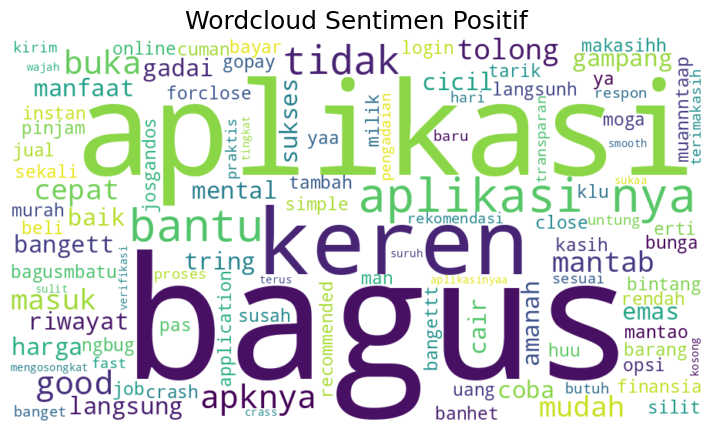

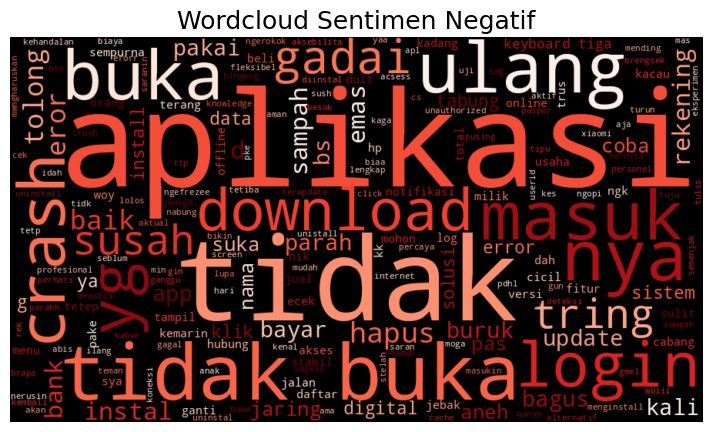

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan hanya mengambil label positif & negatif
df_wordcloud = df[df['label'].isin(["positif", "negatif"])]

# Pisahkan teks berdasarkan label
positive_text = " ".join(df_wordcloud[df_wordcloud['label'] == "positif"]['stemmed_text'])
negative_text = " ".join(df_wordcloud[df_wordcloud['label'] == "negatif"]['stemmed_text'])

# Wordcloud Sentimen Positif
plt.figure(figsize=(10, 5))
wc_pos = WordCloud(width=900, height=500, background_color="white").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=18)
plt.axis("off")
plt.show()

# Wordcloud Sentimen Negatif
plt.figure(figsize=(10, 5))
wc_neg = WordCloud(width=900, height=500, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=18)
plt.axis("off")
plt.show()

In [59]:
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  \
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02   
1                                     aplikasi bagus  2025-11-17 01:58:19   
2                                              bagus  2025-11-17 01:53:45   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58   
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50   

   review_length                                       clean_review  \
0            179  tetiba crash gabisa dibuka sudah di install ul...   
1             14                                     aplikasi bagus   
2              5                                              bagus   
3            106  ini pegadaian it nya cuma ngopi doang ama nger...   
4            263  aplikasi pembiayaan terburuk yang pernah saya ...   

                                  normalized_content  \
0  tetiba crash tidak bisa dibuka sudah di instal...   
1                                     aplikasi bagus   
2                                              bagus   
3  ini pegadaian it nya cuma ngopi aja ama ngerok...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                              tokens  \
0  [tetiba, crash, tidak, bisa, dibuka, sudah, di...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [ini, pegadaian, it, nya, cuma, ngopi, aja, am...   
4  [aplikasi, pembiayaan, terburuk, yang, pernah,...   

                                      tokens_no_stop  \
0  [tetiba, crash, tidak, dibuka, install, ulang,...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [pegadaian, it, nya, ngopi, aja, ama, ngerokok...   
4  [aplikasi, pembiayaan, terburuk, pakai, membin...   

                                      stemmed_tokens  \
0  [tetiba, crash, tidak, buka, install, ulang, s...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [gadai, it, nya, ngopi, aja, ama, ngerokok, ya...   
4  [aplikasi, biaya, buruk, pakai, bingung, kes, ...   

                                        stemmed_text    label label_vader  \
0  tetiba crash tidak buka install ulang stelah c...  negatif     negatif   
1                                     aplikasi bagus  positif     negatif   
2                                              bagus  positif     negatif   
3  gadai it nya ngopi aja ama ngerokok ya abis up...  negatif     negatif   
4  aplikasi biaya buruk pakai bingung kes tidak p...  negatif     negatif   

   tb_polarity tb_label label_transformer label_lexicon sentiment_indobert  \
0          0.0  negatif            netral       negatif           negative   
1          0.0  negatif            netral       negatif           positive   
2          0.0  negatif            netral       negatif           positive   
3          0.0  negatif            netral       negatif           negative   
4          0.0  negatif            netral       negatif           negative   

  label_fixed  
0    negative  
1    positive  
2    positive  
3    negative  
4    negative

# VECTORIZED

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['stemmed_text'])
y = df['sentiment_indobert']

# KORELASI

In [61]:
# Menambahkan kolom 'word_count' untuk panjang ulasan berdasarkan 'stemmed_text'
df['word_count'] = df['stemmed_text'].apply(lambda x: len(x.split()))

In [62]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = df[['score', 'word_count']].corr()

# Menampilkan korelasi
print(correlation_matrix)

              score  word_count
score       1.00000    -0.56087
word_count -0.56087     1.00000


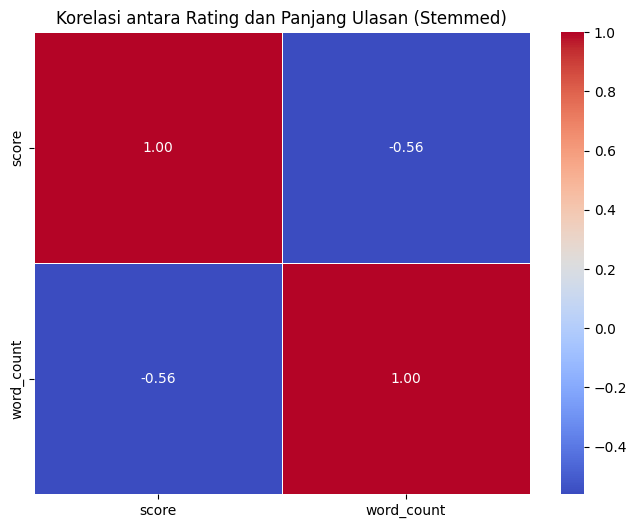

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Rating dan Panjang Ulasan (Stemmed)')
plt.show()

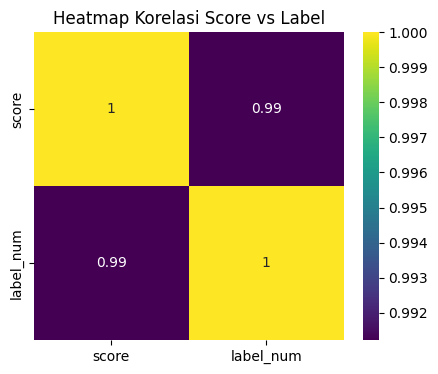

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_binary['label_num'] = le.fit_transform(df_binary['label'])

df_binary[['label', 'label_num']].head()

df_corr = df_binary[['score', 'label_num']].corr()
df_corr

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title("Heatmap Korelasi Score vs Label")
plt.show()


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df_binary['clean_review'])
y = df_binary['label_num']

# Hitung korelasi setiap fitur TF-IDF dengan label
correlations = []
for i in range(X_tfidf.shape[1]):
    corr = np.corrcoef(X_tfidf.toarray()[:, i], y)[0, 1]
    correlations.append(corr)

# Buat tabel top 20 korelasi tertinggi
feature_names = tfidf.get_feature_names_out()
corr_df = pd.DataFrame({
    'feature': feature_names,
    'correlation': correlations
})

corr_df.sort_values(by='correlation', ascending=False).head(20)


feature  correlation
38      bagus     0.345938
442    sangat     0.274454
244     keren     0.172220
298    mantap     0.169811
312  membantu     0.148719
26        apk     0.128847
44     banget     0.114399
40     baguss     0.113519
458    sekali     0.109562
174      good     0.106386
367        ok     0.098938
43       baik     0.095720
91      cepat     0.093820
336     mudah     0.088958
580      yang     0.086214
41    bagusss     0.080568
273  langsung     0.080560
20     amanah     0.080279
162   gampang     0.080266
295    mantab     0.078654

In [66]:
df.head()

userName  score  \
0                Ndahh Star      1   
1  Putri Difa Eka ramadhani      5   
2            Edi Supriyanto      5   
3            Fauzi Setiawan      1   
4                Aqsya Amel      1   

                                             content                   at  \
0  tetiba crash, gabisa dibuka, sudah di install ...  2025-11-17 02:11:02   
1                                     aplikasi bagus  2025-11-17 01:58:19   
2                                              bagus  2025-11-17 01:53:45   
3  Ini pegadaian IT nya cuma ngopi doang ama nger...  2025-11-17 01:46:58   
4  aplikasi pembiayaan terburuk yang pernah saya ...  2025-11-17 01:33:50   

   review_length                                       clean_review  \
0            179  tetiba crash gabisa dibuka sudah di install ul...   
1             14                                     aplikasi bagus   
2              5                                              bagus   
3            106  ini pegadaian it nya cuma ngopi doang ama nger...   
4            263  aplikasi pembiayaan terburuk yang pernah saya ...   

                                  normalized_content  \
0  tetiba crash tidak bisa dibuka sudah di instal...   
1                                     aplikasi bagus   
2                                              bagus   
3  ini pegadaian it nya cuma ngopi aja ama ngerok...   
4  aplikasi pembiayaan terburuk yang pernah saya ...   

                                              tokens  \
0  [tetiba, crash, tidak, bisa, dibuka, sudah, di...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [ini, pegadaian, it, nya, cuma, ngopi, aja, am...   
4  [aplikasi, pembiayaan, terburuk, yang, pernah,...   

                                      tokens_no_stop  \
0  [tetiba, crash, tidak, dibuka, install, ulang,...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [pegadaian, it, nya, ngopi, aja, ama, ngerokok...   
4  [aplikasi, pembiayaan, terburuk, pakai, membin...   

                                      stemmed_tokens  \
0  [tetiba, crash, tidak, buka, install, ulang, s...   
1                                  [aplikasi, bagus]   
2                                            [bagus]   
3  [gadai, it, nya, ngopi, aja, ama, ngerokok, ya...   
4  [aplikasi, biaya, buruk, pakai, bingung, kes, ...   

                                        stemmed_text    label label_vader  \
0  tetiba crash tidak buka install ulang stelah c...  negatif     negatif   
1                                     aplikasi bagus  positif     negatif   
2                                              bagus  positif     negatif   
3  gadai it nya ngopi aja ama ngerokok ya abis up...  negatif     negatif   
4  aplikasi biaya buruk pakai bingung kes tidak p...  negatif     negatif   

   tb_polarity tb_label label_transformer label_lexicon sentiment_indobert  \
0          0.0  negatif            netral       negatif           negative   
1          0.0  negatif            netral       negatif           positive   
2          0.0  negatif            netral       negatif           positive   
3          0.0  negatif            netral       negatif           negative   
4          0.0  negatif            netral       negatif           negative   

  label_fixed  word_count  
0    negative          18  
1    positive           2  
2    positive           1  
3    negative          13  
4    negative          22

# PEMBAGIAN DATA

In [67]:
from sklearn.model_selection import train_test_split

X = df['stemmed_text']
y = df['label_fixed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # memastikan proporsi label tetap
)

print("Jumlah data training :", len(X_train))
print("Jumlah data testing  :", len(X_test))

Jumlah data training : 160
Jumlah data testing  : 40


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,1))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# IMPLEMENTASI ALGORITMA & SKENARIO

# **ALGORITMA NAIVE BAYES**

In [69]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, title="Confusion Matrix"):
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Akurasi:", acc)
    print()

    # Classification Report
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix: Table
    cm = confusion_matrix(y_true, y_pred)
    print("\n=== Confusion Matrix (Tabel) ===")
    print(cm)

    # Confusion Matrix: Plot
    plt.figure(figsize=(5,4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(y_true))
    disp.plot(cmap="Purples", values_format='d')
    plt.title(title)
    plt.show()

# SKENARIO 1 — Naive Bayes Multiclass (Positif, Netral, Negatif)

=== SKENARIO 1 — Naive Bayes Multiclass ===
Akurasi: 0.8

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.82      0.64      0.72        14
     neutral       0.00      0.00      0.00         2
    positive       0.79      0.96      0.87        24

    accuracy                           0.80        40
   macro avg       0.54      0.53      0.53        40
weighted avg       0.76      0.80      0.77        40


=== Confusion Matrix (Tabel) ===
[[ 9  0  5]
 [ 1  0  1]
 [ 1  0 23]]


<Figure size 500x400 with 0 Axes>

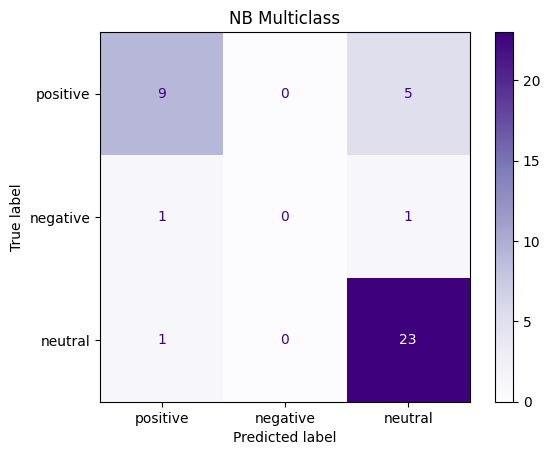

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Data multiclass
X_mc = df['stemmed_text']
y_mc = df['label_fixed']    # 3 kelas

# TF-IDF
tfidf_mc = TfidfVectorizer(max_features=3000)
X_mc_tfidf = tfidf_mc.fit_transform(X_mc)

# Train-test split
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X_mc_tfidf, y_mc, test_size=0.2, stratify=y_mc, random_state=42
)

# Train model Naive Bayes
nb_mc = MultinomialNB()
nb_mc.fit(X_train_mc, y_train_mc)

# Predict
y_pred_mc = nb_mc.predict(X_test_mc)

# Evaluasi
print("=== SKENARIO 1 — Naive Bayes Multiclass ===")
evaluate_model(y_test_mc, y_pred_mc, title="NB Multiclass")


# SKENARIO 2 — Naive Bayes Binary (Positif vs Negatif)

=== SKENARIO 2 — Naive Bayes Binary ===
Akurasi: 0.8157894736842105

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.82      0.64      0.72        14
    positive       0.81      0.92      0.86        24

    accuracy                           0.82        38
   macro avg       0.82      0.78      0.79        38
weighted avg       0.82      0.82      0.81        38


=== Confusion Matrix (Tabel) ===
[[ 9  5]
 [ 2 22]]


<Figure size 500x400 with 0 Axes>

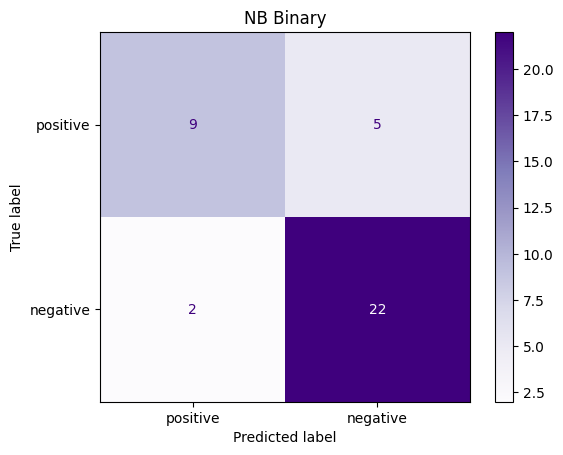

In [71]:
# Filter binary data
df_bin = df[df['label_fixed'].isin(['positive', 'negative'])].copy()

X_bin = df_bin['stemmed_text']
y_bin = df_bin['label_fixed']

# TF-IDF hanya sekali
tfidf_bin = TfidfVectorizer(
    max_features=3000,
    token_pattern=r"(?u)\b\w+\b"
)

X_bin_tfidf = tfidf_bin.fit_transform(X_bin)

# Split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin_tfidf, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# Train model
nb_bin = MultinomialNB()
nb_bin.fit(X_train_bin, y_train_bin)

# Predict
y_pred_bin = nb_bin.predict(X_test_bin)

print("=== SKENARIO 2 — Naive Bayes Binary ===")
evaluate_model(y_test_bin, y_pred_bin, title="NB Binary")


# SKENARIO 3 — Naive Bayes Binary + Chi-Square Feature Selection

=== SKENARIO 3 — Naive Bayes Binary + Chi-Square ===
Akurasi: 0.8157894736842105

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.82      0.64      0.72        14
    positive       0.81      0.92      0.86        24

    accuracy                           0.82        38
   macro avg       0.82      0.78      0.79        38
weighted avg       0.82      0.82      0.81        38


=== Confusion Matrix (Tabel) ===
[[ 9  5]
 [ 2 22]]


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=1000 is greater than n_features=371. All the features will be returned.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

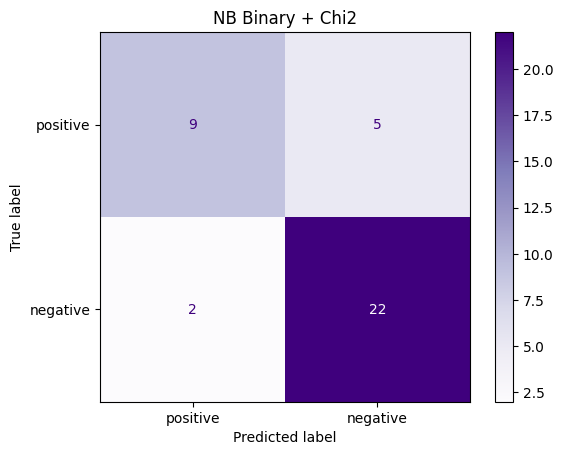

In [72]:
from sklearn.feature_selection import SelectKBest, chi2

# TF-IDF untuk binary
tfidf_chi = TfidfVectorizer(max_features=5000)
X_chi = tfidf_chi.fit_transform(X_bin)

# Split data
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(
    X_chi, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# Chi-Square Feature Selection
selector = SelectKBest(chi2, k=1000)
selector.fit(X_train_chi, y_train_chi)

X_train_sel = selector.transform(X_train_chi)
X_test_sel = selector.transform(X_test_chi)

# Train Naive Bayes
nb_chi = MultinomialNB()
nb_chi.fit(X_train_sel, y_train_chi)

# Predict
y_pred_chi = nb_chi.predict(X_test_sel)

# Evaluasi
print("=== SKENARIO 3 — Naive Bayes Binary + Chi-Square ===")
evaluate_model(y_test_chi, y_pred_chi, title="NB Binary + Chi2")


# **ALGORITMA RANDOM FOREST**

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dataset binary saja
df_bin = df[df['label_fixed'].isin(['positif', 'negatif'])].copy()

X = df['stemmed_text']
y = df['label_fixed']

# TF-IDF
tfidf_rf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf_rf.fit_transform(X)

# SKENARIO 1 — Random Forest (Train 80% : Test 20%)

=== SKENARIO 1 — Random Forest 80:20 ===
Akurasi: 0.875

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.85      0.79      0.81        14
     neutral       0.00      0.00      0.00         2
    positive       0.89      1.00      0.94        24

    accuracy                           0.88        40
   macro avg       0.58      0.60      0.59        40
weighted avg       0.83      0.88      0.85        40


=== Confusion Matrix (Tabel) ===
[[11  0  3]
 [ 2  0  0]
 [ 0  0 24]]


<Figure size 500x400 with 0 Axes>

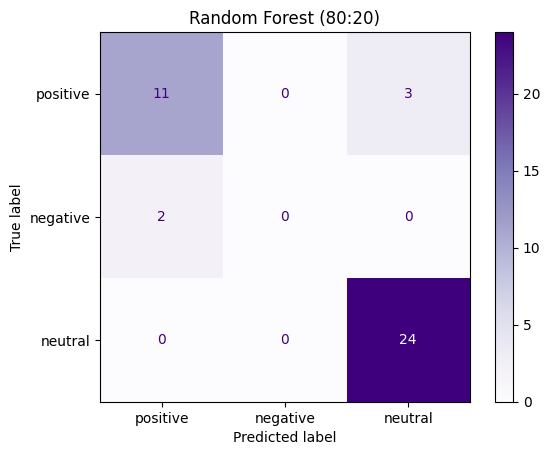

In [74]:
# SKENARIO 6
print("=== SKENARIO 1 — Random Forest 80:20 ===")

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_tfidf, y, test_size=0.20, stratify=y, random_state=42
)

rf1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf1.fit(X_train_1, y_train_1)
y_pred_1 = rf1.predict(X_test_1)

evaluate_model(y_test_1, y_pred_1, title="Random Forest (80:20)")

# SKENARIO 2 — Random Forest (Train 70% : Test 30%)

=== SKENARIO 5 — Random Forest 70:30 ===
Akurasi: 0.8166666666666667

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.76      0.73      0.74        22
     neutral       0.00      0.00      0.00         3
    positive       0.85      0.94      0.89        35

    accuracy                           0.82        60
   macro avg       0.54      0.56      0.55        60
weighted avg       0.77      0.82      0.79        60


=== Confusion Matrix (Tabel) ===
[[16  0  6]
 [ 3  0  0]
 [ 2  0 33]]


<Figure size 500x400 with 0 Axes>

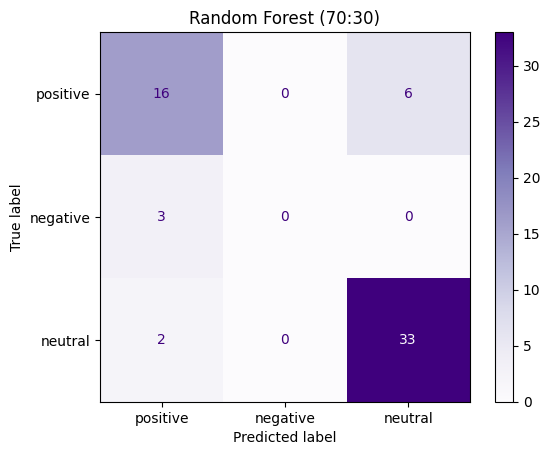

In [75]:
# SKENARIO 5
print("=== SKENARIO 5 — Random Forest 70:30 ===")

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_tfidf, y, test_size=0.30, stratify=y, random_state=42
)

rf2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf2.fit(X_train_2, y_train_2)
y_pred_2 = rf2.predict(X_test_2)

evaluate_model(y_test_2, y_pred_2, title="Random Forest (70:30)")

# SKENARIO 3 — Random Forest (Train 90% : Test 10%)

=== SKENARIO 6 — Random Forest 90:10 ===
Akurasi: 0.85

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.83      0.71      0.77         7
     neutral       0.00      0.00      0.00         1
    positive       0.86      1.00      0.92        12

    accuracy                           0.85        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.81      0.85      0.82        20


=== Confusion Matrix (Tabel) ===
[[ 5  0  2]
 [ 1  0  0]
 [ 0  0 12]]


<Figure size 500x400 with 0 Axes>

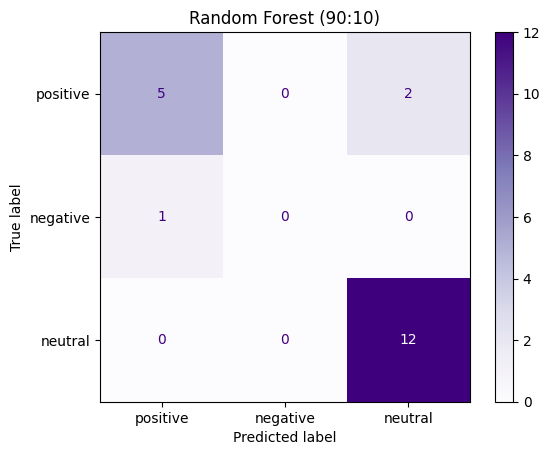

In [76]:
# SKENARIO 6
print("=== SKENARIO 6 — Random Forest 90:10 ===")

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_tfidf, y, test_size=0.10, stratify=y, random_state=42
)

rf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf3.fit(X_train_3, y_train_3)
y_pred_3 = rf3.predict(X_test_3)

evaluate_model(y_test_3, y_pred_3, title="Random Forest (90:10)")

In [77]:
df['label_fixed'].value_counts()


label_fixed
positive    118
negative     72
neutral      10
Name: count, dtype: int64